In [12]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('USAID_Health_Comodity_Delivery_CleanUp.csv')
# Convert the columns to datetime format if they are not already
df['Latest Actual Delivery Date'] = pd.to_datetime(df['Latest Actual Delivery Date'])
df['Order Entry Date'] = pd.to_datetime(df['Order Entry Date'])

# Create the new column
df['Actual Lead Time'] = df['Latest Actual Delivery Date'] - df['Order Entry Date']
df['Actual Lead Time'] = df['Actual Lead Time'].dt.days

# Fill the missing values with the median
#df['Estimated Lead Time in Days'] = df['Estimated Lead Time in Days'].fillna(df['Estimated Lead Time in Days'].median())
# Select the desired columns
features = ['Country', 'Transportation Mode', 'Order Type', 'Fulfillment Method', 'Product Category', 'Vendor Incoterm', 'Reason Code', 'Item Tracer Category','Manufacture','Pick Up',
            'Quality Assurance','Illustrative Price','Ordered Quantity']
#            'Shipped Quantity']
target = ['Actual Lead Time']
df = df[features + target]
df['Reason Code'] = df['Reason Code'].str.slice(0, 2)
#df=df.dropna()

/tmp/ipykernel_9005/3195348157.py:4: DtypeWarning: Columns (50,51,52,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('USAID_Health_Comodity_Delivery_CleanUp.csv')


In [13]:
df

,Country,Transportation Mode,Order Type,Fulfillment Method,Product Category,Vendor Incoterm,Reason Code,Item Tracer Category,Manufacture,Pick Up,Quality Assurance,Illustrative Price,Ordered Quantity,Actual Lead Time
0,Mozambique,Land,Purchase Order,Direct Drop,Others,DDP,NaN,Laboratory,NaN,NaN,NaN,2898.00,1,287
1,Mozambique,Land,Purchase Order,Direct Drop,Others,DDP,NaN,Laboratory,NaN,NaN,NaN,2898.00,1,289
2,Mozambique,Land,Purchase Order,Direct Drop,Others,DDP,NaN,Laboratory,NaN,NaN,NaN,2898.00,1,287
3,Mozambique,Land,Purchase Order,Direct Drop,Others,DDP,NaN,Laboratory,NaN,NaN,NaN,2898.00,1,287
4,Mozambique,Land,Purchase Order,Direct Drop,Others,DDP,NaN,Laboratory,NaN,NaN,NaN,2898.00,1,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38500,Zimbabwe,Air,Purchase Order,Direct Drop,Essential Medicines,FCA,NaN,Other Pharma,NaN,NaN,NaN,5.93,3892,298
38501,Senegal,Sea,Purchase Order,Direct Drop,Long Lasting Insecticide Treated Nets (LLINs),FCA,AD,LLINs,224.0,94.0,45.0,2.79,486022,694
38502,Zimbabwe,Sea,Purchase Order,Direct Drop,Voluntary Male Circumcision (VMMC) Kits,FCA,NaN,VMMC,NaN,NaN,NaN,12.48,49759,211
38503,Tanzania,Sea,Purchase Order,Direct Drop,Voluntary Male Circumcision (VMMC) Kits,FCA,NaN,VMMC,NaN,NaN,NaN,12.48,16500,344


In [14]:
# Convert columns to 'category' type
for col in features:
    if col in ['Manufacture','Pick Up','Quality Assurance','Illustrative Price','Ordered Quantity']:
        continue
    df[col] = df[col].astype('category')

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Dictionary to hold the mappings for each column
mapping = {}

# Apply the LabelEncoder to the categorical columns
for col in features:
    if col in ['Manufacture','Pick Up','Quality Assurance','Illustrative Price','Ordered Quantity']:
        continue

    df[col] = le.fit_transform(df[col])
    mapping[col] = dict(zip(le.transform(le.classes_), le.classes_))  # Reverse the mappings

# Print the mappings
for col, map_dict in mapping.items():
    print(f"{col}: {map_dict}")



Country: {0: 'Afghanistan', 1: 'Angola', 2: 'Antigua and Barbuda', 3: 'Australia', 4: 'Bahamas', 5: 'Bangladesh', 6: 'Barbados', 7: 'Belgium', 8: 'Benin', 9: 'Bhutan', 10: 'Bolivia', 11: 'Botswana', 12: 'Brazil', 13: 'Burkina Faso', 14: 'Burundi', 15: 'Cambodia', 16: 'Cameroon', 17: 'Chile', 18: 'Colombia', 19: 'Congo DRC', 20: "Côte d'Ivoire", 21: 'Dominican Republic', 22: 'Ecuador', 23: 'Egypt', 24: 'El Salvador', 25: 'Eswatini', 26: 'Ethiopia', 27: 'Fiji', 28: 'Gabon', 29: 'Ghana', 30: 'Guatemala', 31: 'Guinea', 32: 'Guyana', 33: 'Haiti', 34: 'Honduras', 35: 'India', 36: 'Indonesia', 37: 'Italy', 38: 'Jamaica', 39: 'Jordan', 40: 'Kazakhstan', 41: 'Kenya', 42: 'Kiribati', 43: 'Kyrgyz Republic', 44: 'Laos', 45: 'Lesotho', 46: 'Liberia', 47: 'Madagascar', 48: 'Malawi', 49: 'Maldives', 50: 'Mali', 51: 'Mauritania', 52: 'Mongolia', 53: 'Mozambique', 54: 'Myanmar', 55: 'Namibia', 56: 'Nauru', 57: 'Nepal', 58: 'Netherlands', 59: 'Nicaragua', 60: 'Niger', 61: 'Nigeria', 62: 'Pakistan', 63: 

In [5]:
df

,Country,Transportation Mode,Order Type,Fulfillment Method,Product Category,Vendor Incoterm,Reason Code,Item Tracer Category,Manufacture,Pick Up,Quality Assurance,Illustrative Price,Ordered Quantity,Actual Lead Time
0,53,1,1,0,23,38,3,13,NaN,NaN,NaN,2898.00,1,287
1,53,1,1,0,23,38,3,13,NaN,NaN,NaN,2898.00,1,289
2,53,1,1,0,23,38,3,13,NaN,NaN,NaN,2898.00,1,287
3,53,1,1,0,23,38,3,13,NaN,NaN,NaN,2898.00,1,287
4,53,1,1,0,23,38,3,13,NaN,NaN,NaN,2898.00,1,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38500,94,0,1,0,3,77,3,16,NaN,NaN,NaN,5.93,3892,298
38501,74,3,1,0,14,77,0,12,224.0,94.0,45.0,2.79,486022,694
38502,94,3,1,0,31,77,3,25,NaN,NaN,NaN,12.48,49759,211
38503,82,3,1,0,31,77,3,25,NaN,NaN,NaN,12.48,16500,344


from sklearn.ensemble import RandomForestRegressor

# Define the features and the target
X = df.drop('Actual Lead Time', axis=1)
y = df['Actual Lead Time']

# Initialize a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances_df)


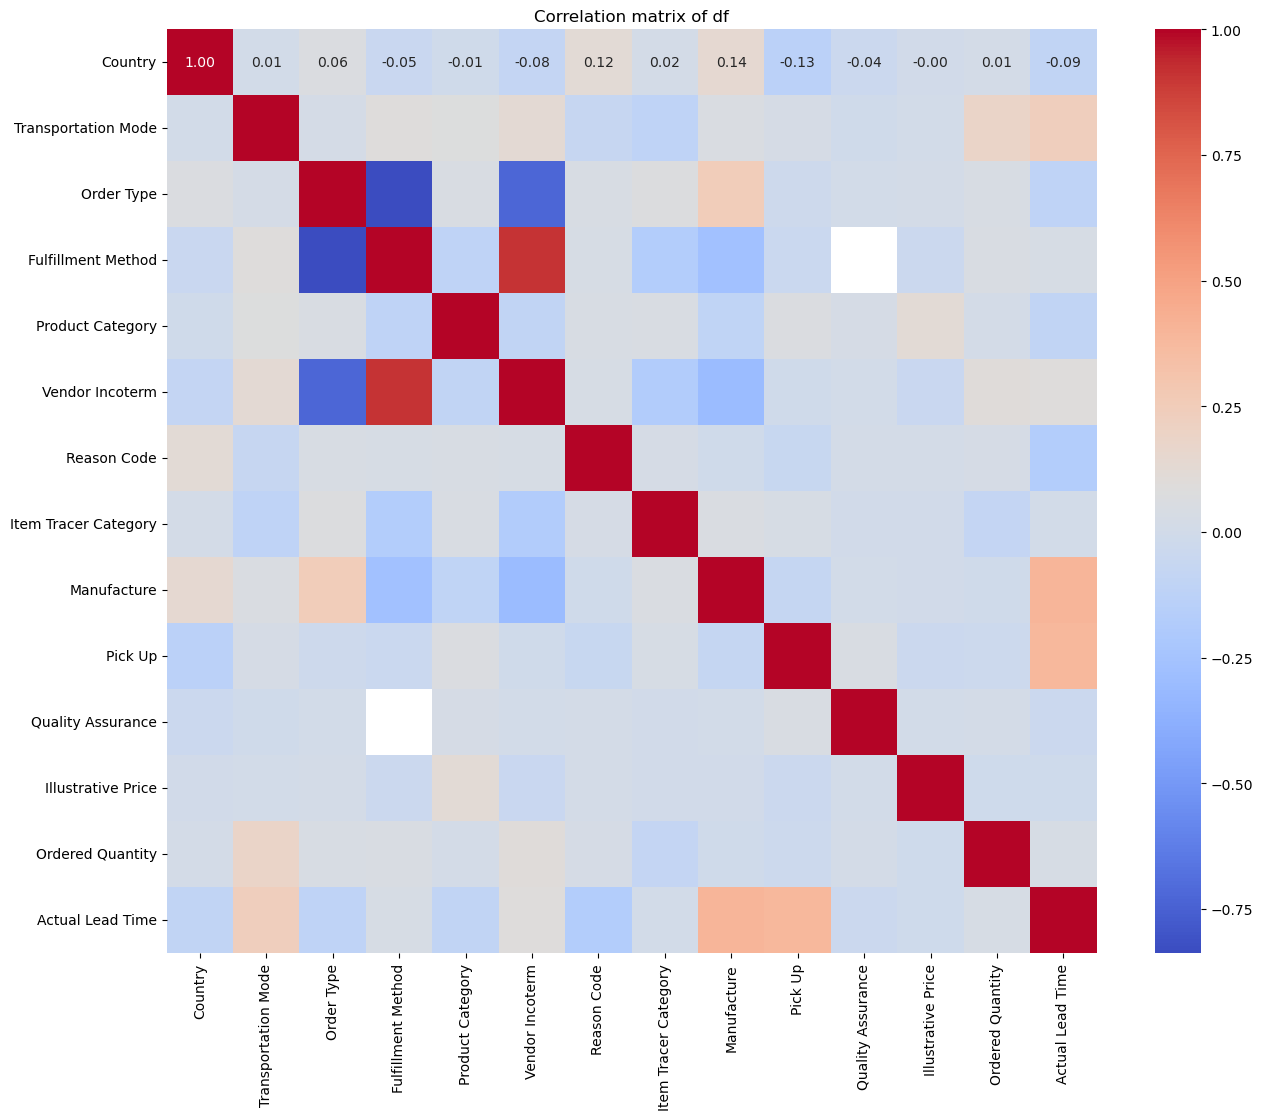

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 10})  # Decrease font size
plt.title('Correlation matrix of df')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from math import sqrt

# Define the features and the target
X = df[features]
y = df['Actual Lead Time']

# Define the categorical features (all features except 'Quality Assurance')
categorical_features = [feature for feature in features if not(feature in ['Manufacture','Pick Up','Quality Assurance','Illustrative Price','Ordered Quantity'])]

# Create a transformer for the categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Create a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
])

# Transform the features
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor(random_state=0)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=0)),
    ('Support Vector', SVR())
]

# Loop through the models
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics
    print(f'{name}:')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}\n')

Linear Regression:
Root Mean Squared Error: 107.88405621364451
R-squared: 0.3150065477508015

Decision Tree:
Root Mean Squared Error: 97.76793059013916
R-squared: 0.4374453324638987

Random Forest:
Root Mean Squared Error: 94.91918923879743
R-squared: 0.46975091612268305

Gradient Boosting:
Root Mean Squared Error: 106.67534687397294
R-squared: 0.3302695974039208

Support Vector:
Root Mean Squared Error: 110.3299413222101
R-squared: 0.28359491254967806

